**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   EQUIPO: 42
*   NOMBRE: Javier Alejandro Pérez Garza
*   MATRÍCULA: A01284386
*   NOMBRE: Marco Antonio Corona Ruiz
*   MATRÍCULA: A01370358
*   NOMBRE: Emiliano Saucedo Arriola
*   MATRÍCULA: A01659258
*   NOMBRE: César Miguel Barrientos Robles
*   MATRÍCULA: A01796615

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/"
#DIR = "/content/drive/MyDrive/MNA/TC4029/Semana 6/"

os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [6]:
print(f"Las columnas antes de la limpieza son {len(cars_df.columns)}:")
for i in range(0, len(cars_df.columns), 5):
    print(" | ".join(cars_df.columns[i:i+5]))

Las columnas antes de la limpieza son 26:
id | url | region | region_url | price
year | manufacturer | model | condition | cylinders
fuel | odometer | title_status | transmission | VIN
drive | size | type | paint_color | image_url
description | county | state | lat | long
posting_date


In [7]:
col = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df = cars_df.drop(columns=col)

In [8]:
print(f"Las columnas después de la limpieza son {len(cars_df.columns)}:")
for i in range(0, len(cars_df.columns), 5):
    print(" | ".join(cars_df.columns[i:i+5]))

Las columnas después de la limpieza son 18:
region | region_url | price | year | manufacturer
model | condition | cylinders | fuel | odometer
title_status | transmission | drive | size | type
paint_color | county | state


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [9]:
# Registros
records_count = cars_df.shape[0]
print(f"El dataset tiene {records_count} registros.")

El dataset tiene 426880 registros.


In [10]:
# Columnas
num_cols = cars_df.shape[1]
print(f"El dataset tiene {num_cols} columnas.")

El dataset tiene 18 columnas.


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [11]:
# Numero de valores faltantes por columna
missing_values_count = cars_df.isna().sum()
# Porcentaje de valores faltantes por columna)
missing_percentage = (missing_values_count / records_count) * 100
print(f"Las columnas que poseen valores faltantes son:\n{missing_percentage}")
print("-"*50)
print(f"Las columnas que poseen 30% o más de valores faltantes son:\n{missing_percentage[missing_percentage >= 30]}")

Las columnas que poseen valores faltantes son:
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64
--------------------------------------------------
Las columnas que poseen 30% o más de valores faltantes son:
condition       40.785232
cylinders       41.622470
drive           30.586347
size            71.767476
paint_color     30.501078
county         100.000000
dtype: float64


In [12]:
umbral = records_count * 0.7 # 70%
cars_df = cars_df.dropna(axis=1, thresh = umbral)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


In [13]:
removed_missing_cols = num_cols - cars_df.shape[1]
print(f"Se eliminaron {removed_missing_cols} columnas.")

Se eliminaron 6 columnas.


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [14]:
missing_below = missing_percentage[missing_percentage < 5]
print(f"Las columnas con menos del 5% de valores faltantes son:\n{missing_below}")

Las columnas con menos del 5% de valores faltantes son:
region          0.000000
region_url      0.000000
price           0.000000
year            0.282281
manufacturer    4.133714
model           1.236179
fuel            0.705819
odometer        1.030735
title_status    1.930753
transmission    0.598763
state           0.000000
dtype: float64


In [15]:
#Borra los registros que contengan Nan en columnas con menos del 5% de valores faltantes
cars_df = cars_df.dropna(subset = missing_below.index).reset_index(drop=True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389604 entries, 0 to 389603
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          306976 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 35.7+ MB


In [16]:
removed_records = records_count - cars_df.shape[0]
removed_records_percentage = (removed_records / records_count) * 100
print(f"Se eliminaron {removed_records} registros, lo que representa un {removed_records_percentage}% del total de registros.")

Se eliminaron 37276 registros, lo que representa un 8.7321964017991% del total de registros.


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [17]:
new_miss_values_count = cars_df.isna().sum()
new_percentage = (new_miss_values_count / cars_df.shape[0]) * 100
new_percentage

,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.000000
manufacturer,0.000000
model,0.000000
fuel,0.000000
odometer,0.000000
title_status,0.000000
transmission,0.000000


In [18]:
cars_df['type'].value_counts()

,count
type,
sedan,80976
SUV,71578
pickup,40934
truck,32035
other,19442
coupe,17109
hatchback,14998
wagon,10095
van,7518


In [19]:
# Imputar valores faltantes por moda (variable categórica)
cars_df['type'] = cars_df['type'].fillna(cars_df['type'].mode()[0])

# Método con sklearn:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='most_frequent')
# cars_df[['type']] = imputer.fit_transform(cars_df[['type']])
# cars_df['type'].value_counts()

In [20]:
cars_df.isna().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

In [21]:
def plot_hist(df, variables, rows, cols, width, height, plot_color):
    fig, axs = plt.subplots(rows, cols, figsize=(width, height))
    for col, ax in zip(variables, axs):
        sns.histplot(df[col], bins=30, color=plot_color, edgecolor=None, ax=ax)
        ax.set(title=f'Histograma de {col}', xlabel=None, ylabel='Frecuencia')
        ax.axvline(df[col].mean(), color='r', linestyle='--', label='mean')
        ax.axvline(df[col].median(), color='g', linestyle='-', label='median')
        ax.legend()

    plt.tight_layout()
    plt.show()

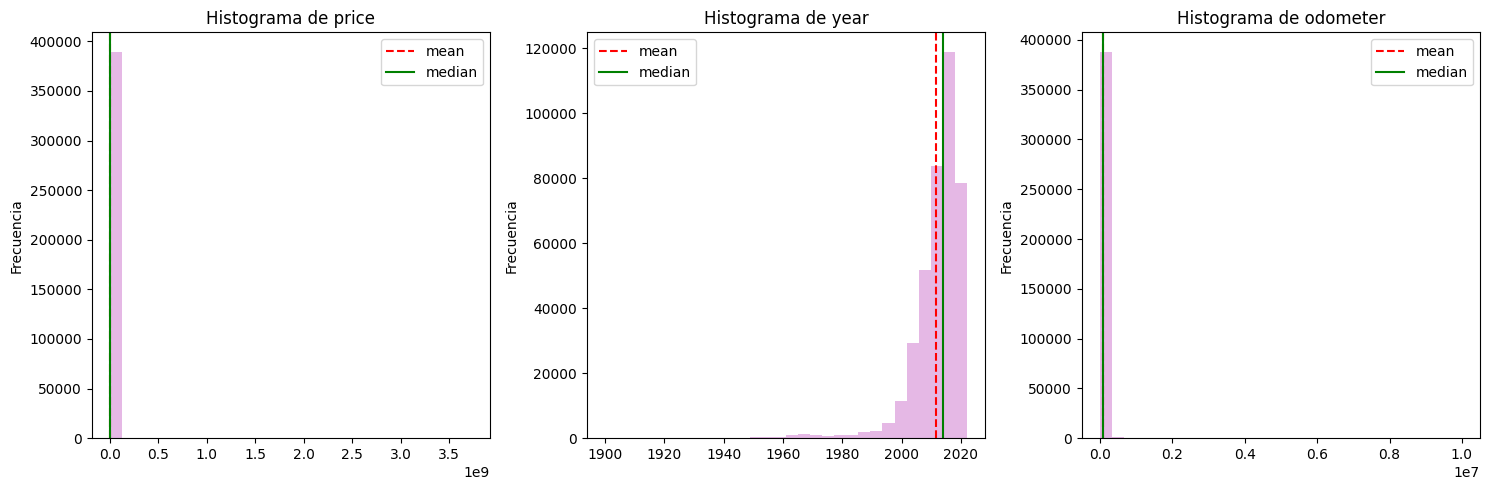

In [22]:
variables = ['price', 'year', 'odometer']
plot_hist(cars_df, variables, rows=1, cols=3, width=15, height=5, plot_color='plum')

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [23]:
import datetime

current_year = datetime.datetime.now().year
cars_df['age'] = current_year - cars_df['year']
cars_df[['age', 'year']].head()

,age,year
0,10.0,2014.0
1,14.0,2010.0
2,4.0,2020.0
3,7.0,2017.0
4,11.0,2013.0


In [24]:
cars_df.drop(columns=['year'], inplace=True)
cars_df.head()

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0


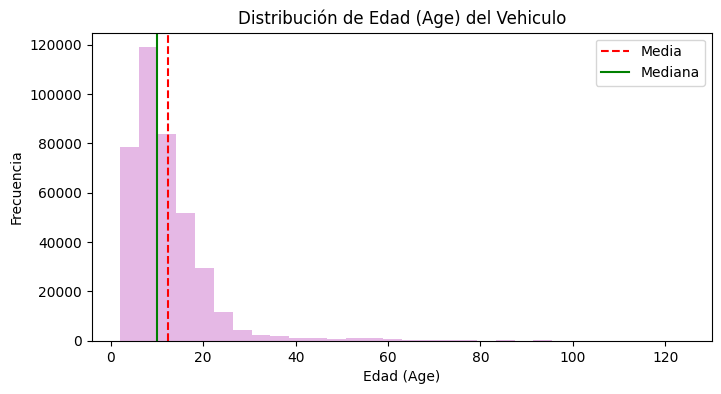

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(cars_df['age'], bins=30, color='plum', edgecolor='None')
plt.axvline(cars_df['age'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(cars_df['age'].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.title('Distribución de Edad (Age) del Vehiculo')
plt.xlabel('Edad (Age)')
plt.ylabel('Frecuencia')
plt.show()


4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

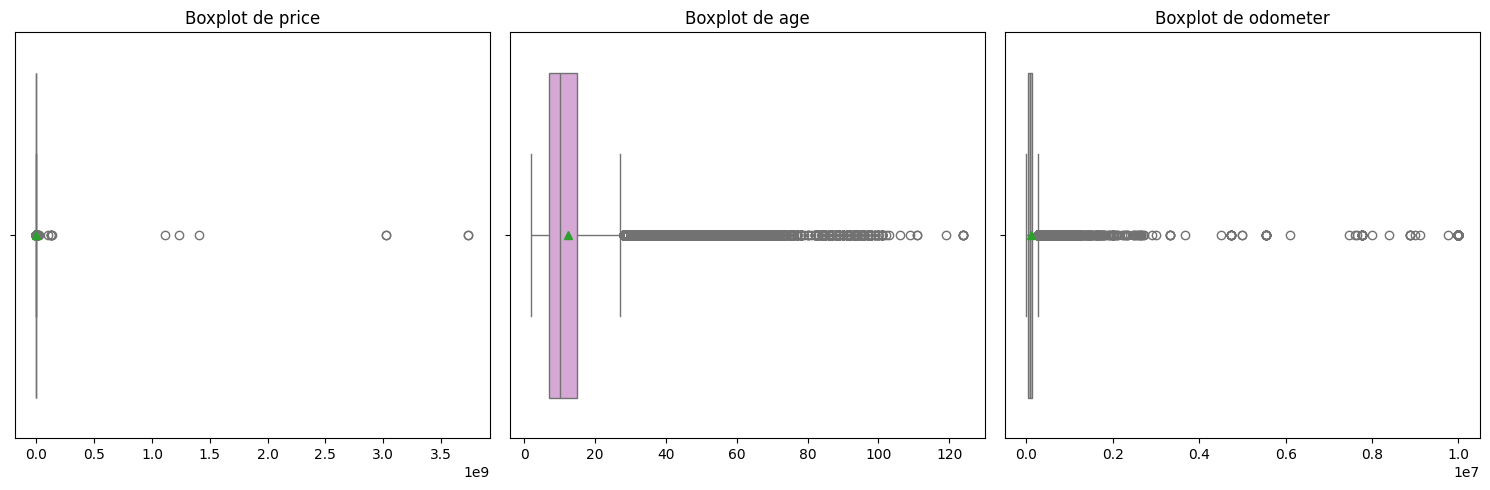

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
variables = ['price', 'age', 'odometer']

for col, ax in zip(variables, axs):
    sns.boxplot(x=cars_df[col], ax=ax, color='plum', showmeans=True)
    ax.set(xlabel=None, title=f'Boxplot de {col}')

plt.tight_layout()
plt.show()


Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [27]:
def IQR_method(df, column_name):
    # Calcular Q1 y Q3
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return IQR, lower_bound, upper_bound

In [28]:
results = {}

# Eliminar outliers para cada variable
for var in variables:
    IQR, lower_bound, upper_bound = IQR_method(cars_df, var)

    # Contar los valores atípicos
    outliers = cars_df[(cars_df[var] < lower_bound) | (cars_df[var] > upper_bound)]
    num_outliers = len(outliers)

    # Almacenar el porcentaje de valores atípicos para la variable
    percentage_var = (num_outliers / len(cars_df)) * 100
    results[var] = percentage_var

    # Eliminar los registros con valores atípicos
    cars_df = cars_df.drop(outliers.index)

# Restablecer el índice después de eliminar los outliers
cars_df = cars_df.reset_index(drop=True)

In [29]:
print("Se eliminaron los siguientes valores atípicos:")
for var in variables:
    print(f"\t{var}: {results[var]:.2f}%")

# Porcentaje de eliminados hasta el momento
removed_records = records_count - cars_df.shape[0]
removed_records_percentage = (removed_records / records_count) * 100
print(f"Se han eliminado {removed_records} registros, lo que representa un {removed_records_percentage}% del total de registros.")

Se eliminaron los siguientes valores atípicos:
	price: 1.71%
	age: 3.07%
	odometer: 0.74%
Se han eliminado 58447 registros, lo que representa un 13.69166979010495% del total de registros.


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

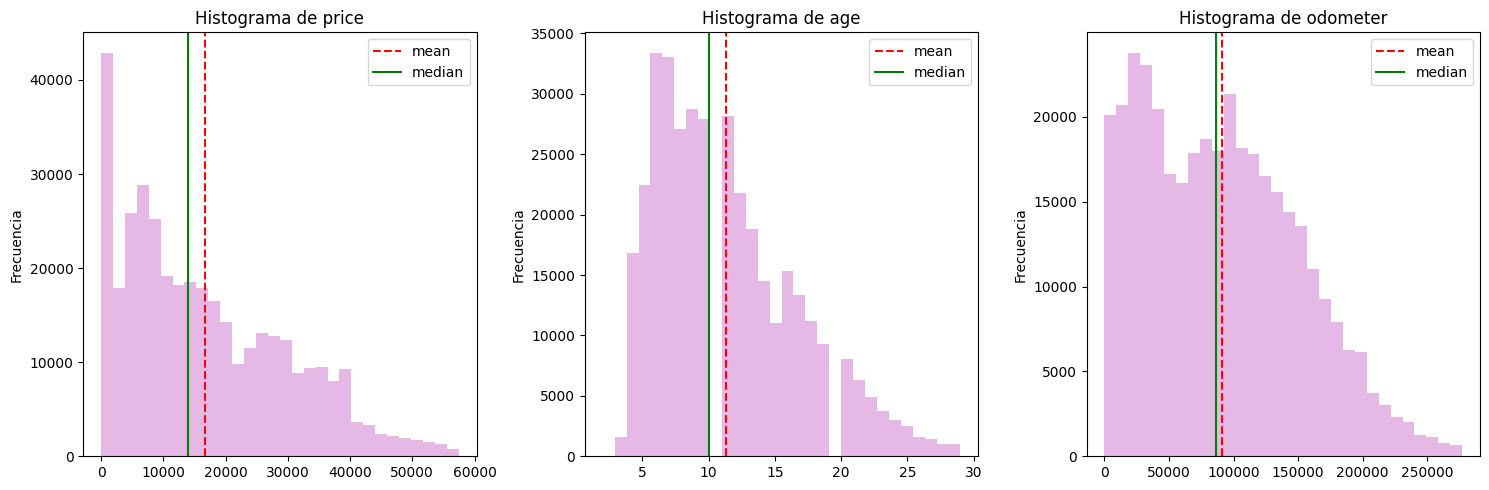

In [30]:
plot_hist(cars_df, variables, rows=1, cols=3, width=15, height=5, plot_color='plum')

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


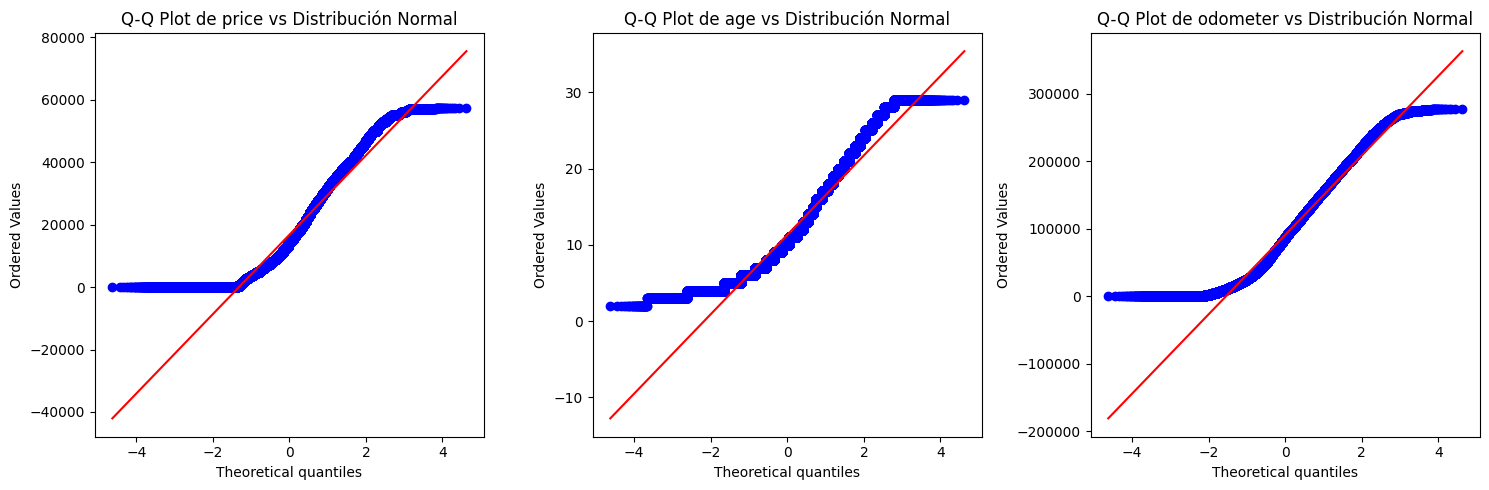

In [31]:
plt.figure(figsize=(15, 5))

# Generar gráfico Q-Q para cada variable
for index, var in enumerate(variables):
    ax = plt.subplot(1, 3, index + 1)
    stats.probplot(cars_df[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot de {var} vs Distribución Normal')

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [32]:
# vars = ['price', 'odometer']
pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_data = pt.fit_transform(cars_df[variables])

transf_df = pd.DataFrame(transformed_data, columns=variables)
transf_df

,price,age,odometer
0,193.563980,2.387911,625.632001
1,163.225489,2.695321,698.226485
2,207.706309,1.604936,347.483442
3,186.983245,2.071931,521.567174
4,136.831542,2.474186,952.940342
...,...,...,...
368428,166.295214,1.786181,458.182655
368429,185.942956,1.604936,271.179380
368430,196.986291,1.604936,154.051753
368431,181.701485,1.939332,441.951156


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

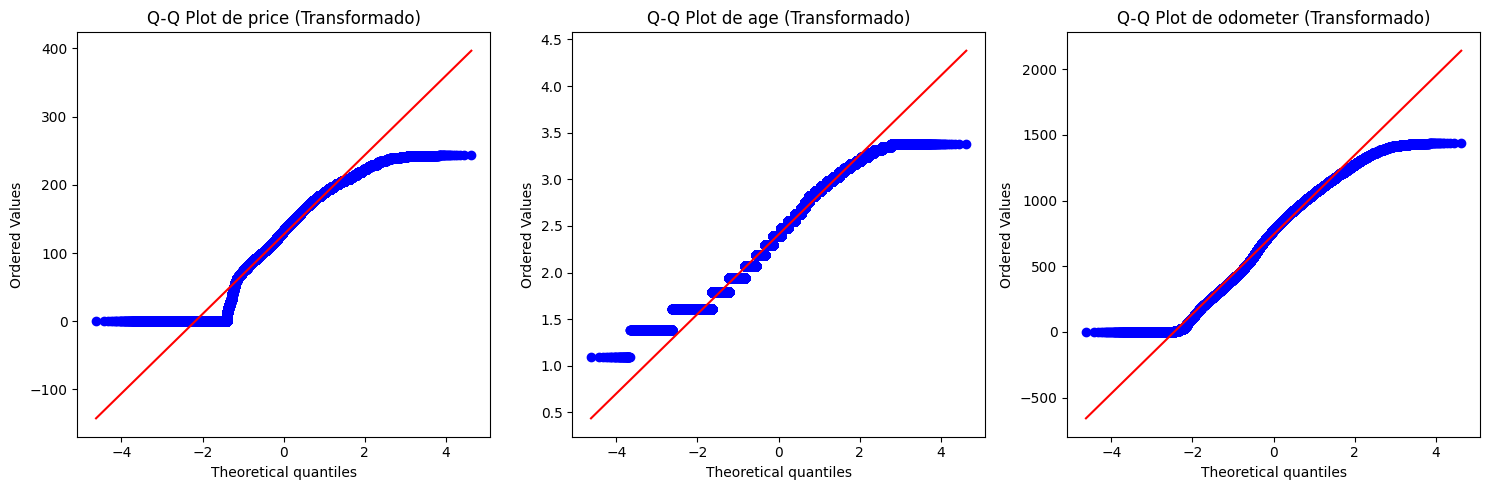

In [33]:
# Graficar los Q-Q plots de las variables transformadas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variables):
    stats.probplot(transf_df[var], dist="norm", plot=axs[i])
    axs[i].set_title(f'Q-Q Plot de {var} (Transformado)')

plt.tight_layout()
plt.show()

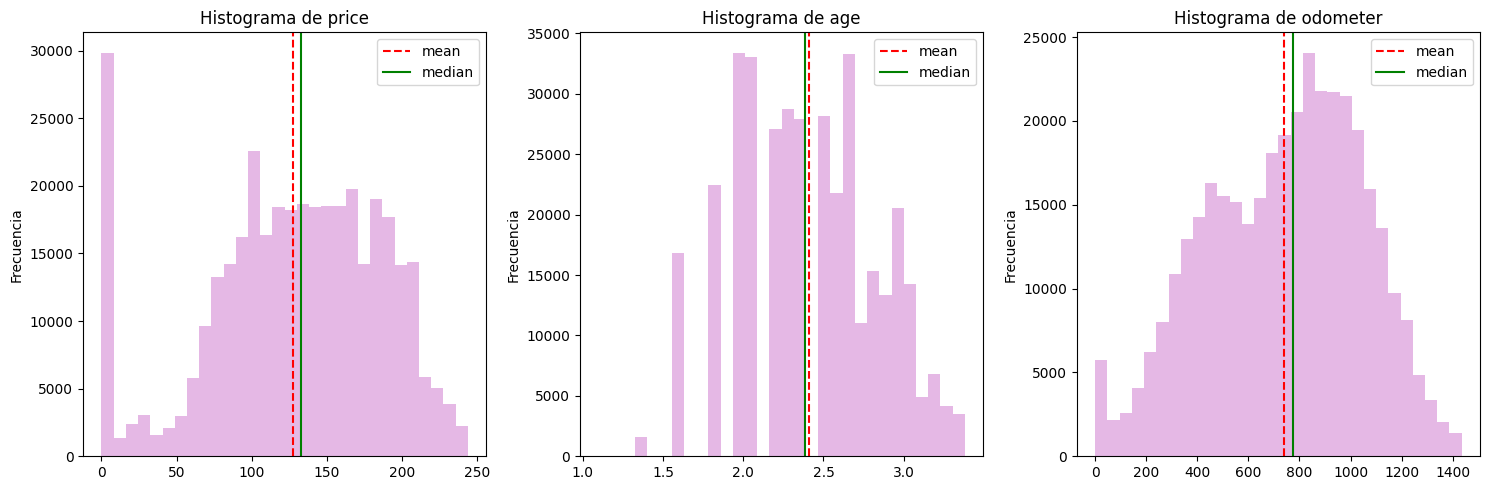

In [34]:
plot_hist(transf_df, variables, rows=1, cols=3, width=15, height=5, plot_color='plum')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [35]:
from sklearn.preprocessing import MinMaxScaler

minmax_df = transf_df.copy()

scaler = MinMaxScaler()
normalized_minmax = scaler.fit_transform(minmax_df[variables])
minmax_df[variables] = pd.DataFrame(normalized_minmax, columns=variables)
minmax_df.head()

,price,age,odometer
0,0.794413,0.565257,0.435888
1,0.669900,0.699813,0.486465
2,0.852455,0.222541,0.242097
3,0.767405,0.426949,0.363384
4,0.561575,0.603020,0.663928


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

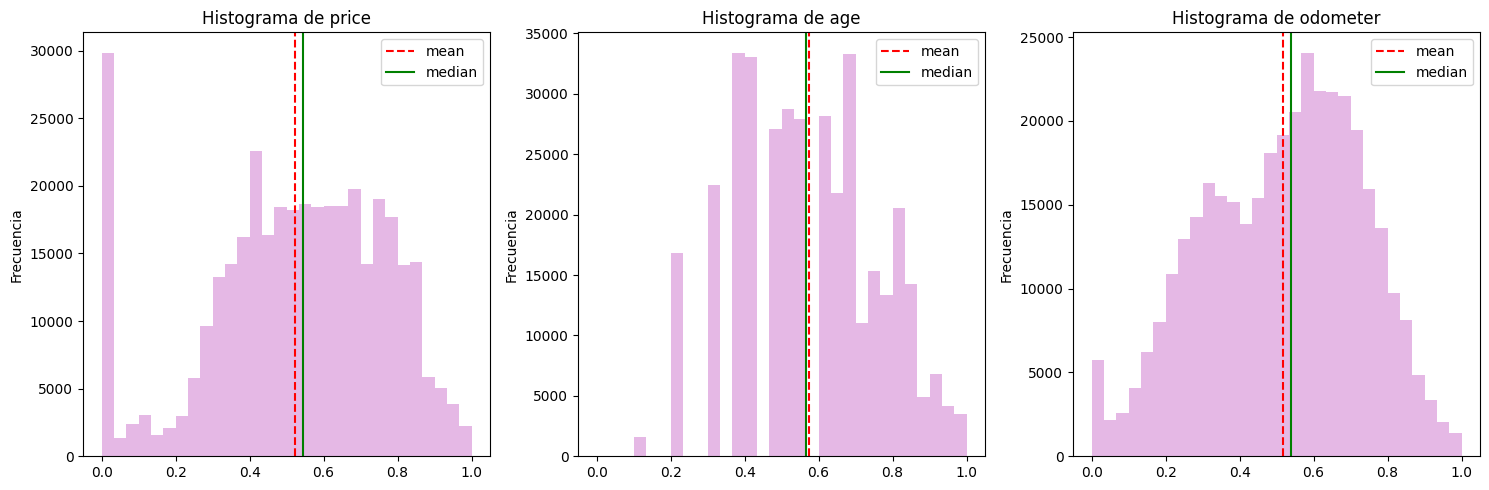

In [36]:
plot_hist(minmax_df, variables, rows=1, cols=3, width=15, height=5, plot_color='plum')

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [37]:
cars_df.describe(include='object').T

,count,unique,top,freq
region,368433,404,columbus,3201
region_url,368433,413,https://grandrapids.craigslist.org,2745
manufacturer,368433,40,ford,62162
model,368433,19314,f-150,7477
fuel,368433,5,gas,313944
title_status,368433,6,clean,356757
transmission,368433,3,automatic,293338
type,368433,13,sedan,155206
state,368433,51,ca,42333


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [38]:
highly_cardinal_variables = []
few_cardinal_variables = []

for col in cars_df.select_dtypes(include='object').columns:
    if cars_df[col].nunique() > 100:
        highly_cardinal_variables.append(col)
    else:
        few_cardinal_variables.append(col)

print('Variables con alta cardinalidad:', highly_cardinal_variables)
print('Variables con baja cardinalidad:', few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

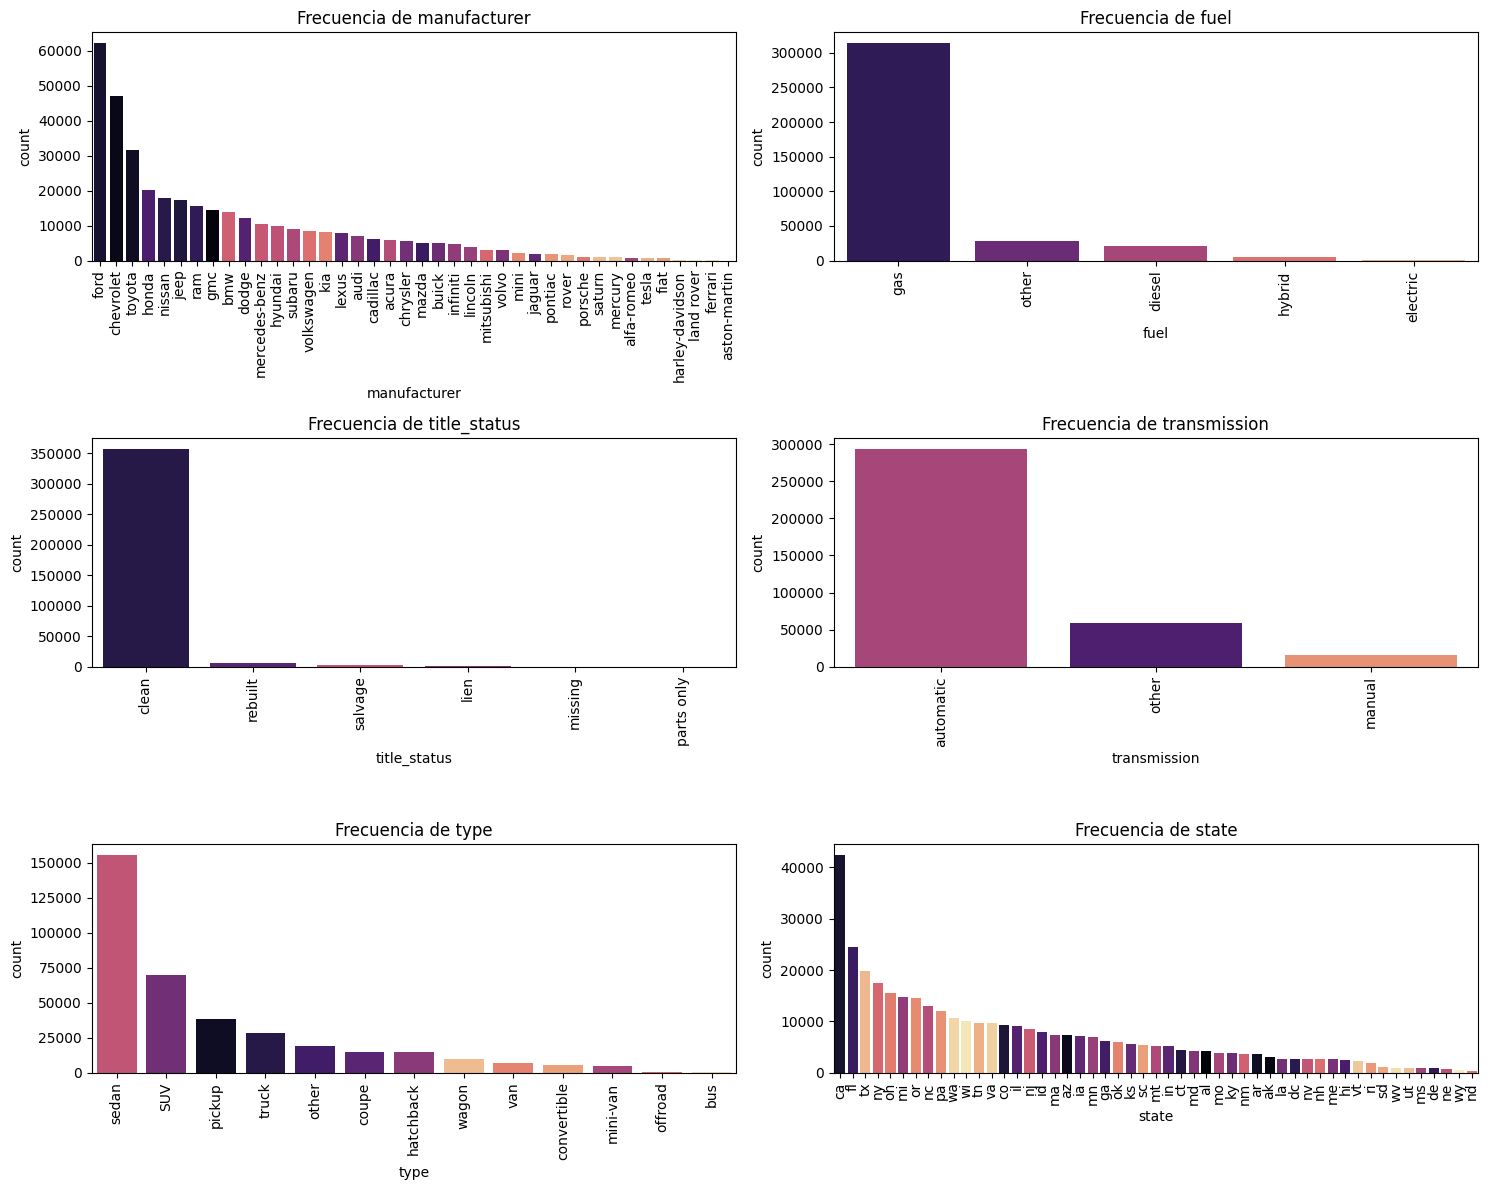

In [39]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(few_cardinal_variables):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=cars_df, x=col, order=cars_df[col].value_counts().index, palette='magma', hue=col)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(cars_df[few_cardinal_variables])
onehot_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(few_cardinal_variables))
onehot_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [41]:
#!pip install category_encoders --quiet

In [42]:
from category_encoders.binary import BinaryEncoder

encoder = BinaryEncoder(cols=highly_cardinal_variables)
binary_df = encoder.fit_transform(cars_df[highly_cardinal_variables])
binary_df.head()

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [43]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
final_df

,price,age,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794413,0.565257,0.435888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669900,0.699813,0.486465,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852455,0.222541,0.242097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767405,0.426949,0.363384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.561575,0.603020,0.663928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368428,0.682498,0.301874,0.319223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,1,1,0,1
368429,0.763135,0.222541,0.188935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
368430,0.808459,0.222541,0.107330,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
368431,0.745728,0.368910,0.307914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,0,0,1,1
